In [1]:
from utils import *
from modules import *
import numpy as np 
import pandas as pd
from PIL import Image
import os
from os import listdir
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import rand_score,adjusted_rand_score
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings("ignore")

## Lineaire

In [2]:
# definir un jeu de données lineairement separable 
seed = 42
np.random.seed(seed)
pos_cen = (-12, -12)
pos_sig = [[1, 4], [4, 1]]

neg_cen = (-2, -2)
neg_sig = [[1, 5], [4, 1]]
data,labels = genere_dataset_gaussian(pos_cen,pos_sig,neg_cen,neg_sig,100,-1,1)
labels = labels.reshape(-1,1)

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 2887.94it/s]


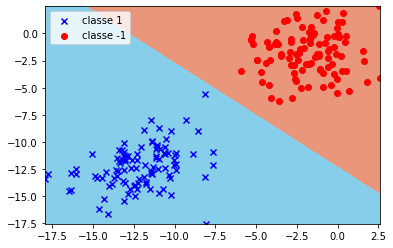

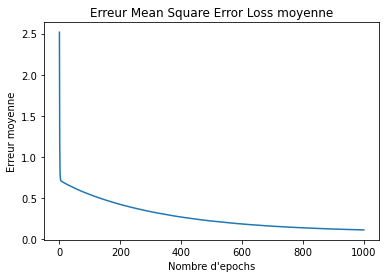

Accuracy  :  1.0


In [3]:
# definir un reseau linaire
facteur_norma = 0.4
plage_biais = (0,1)
neuro_i = 2
neuro_o = 1
batch_size = 50
epochs = 1000

lineaire = ModuleLineaire(neuro_i,neuro_o,plage_biais,facteur_norma,init=1)
mseloss = MSELoss()
network_layers = [lineaire]
network = Sequentiel(network_layers)

opti = Optim(network,mseloss,1e-5)
opti.SGD(data,labels,batch_size,epochs)
opti.affichage(data,labels)

## Non lineaire

In [ ]:
# definir un jeu de données XOR

seed = 42
np.random.seed(seed)
data_xor , labels_xor = create_XOR(200,0.1)


neuro_i_1 = 2
neuro_o_1 = 4
neuro_i_2 = 4
neuro_o_2 = 1
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 50
epochs = 1000


facteur_norma = 0.8
lineaire_1 = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2 = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
mseloss = MSELoss()


network_layers = [lineaire_1,TanH,lineaire_2,sigmoide]
network = Sequentiel(network_layers)


opti = Optim(network,mseloss,1e-3)
opti.SGD(data_xor,labels_xor,batch_size,epochs)
opti.affichage(data_xor,labels_xor)

In [ ]:
# definir un jeu de données XOR

seed = 42
np.random.seed(seed)
data_dirac , label_dirac = create_data_dirac(200,0.1)


neuro_i_1 = 2
neuro_o_1 = 4
neuro_i_2 = 4
neuro_o_2 = 1
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 50
epochs = 1000


facteur_norma = 0.8
lineaire_1 = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2 = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
mseloss = MSELoss()


network_layers = [lineaire_1,TanH,lineaire_2,sigmoide]
network = Sequentiel(network_layers)


opti = Optim(network,mseloss,1e-3)
opti.SGD(data_dirac,label_dirac,batch_size,epochs)
opti.affichage(data_dirac,label_dirac)

## Multi Classe

In [74]:
import pickle as pkl
data = pkl.load(open("data/usps.pkl",'rb'))

X_train = data["X_train"]
Y_train = data["Y_train"]
X_test = data["X_test"]
Y_test = data["Y_test"]

In [ ]:
tsne = TSNE(n_components=2, init='pca',n_iter=500, verbose=0)
repre_2D = tsne.fit_transform(X_train)

plt.title("Representation de l'espace d'origine train apres une t-SNE sur USPS")
plt.scatter(repre_2D[:,0],repre_2D[:,1],c=Y_train)
plt.show()

repre_2D = tsne.fit_transform(X_test)

plt.title("Representation de l'espace d'origine test apres une t-SNE sur USPS")
plt.scatter(repre_2D[:,0],repre_2D[:,1],c=Y_test)
plt.show()

In [ ]:
np.random.seed(42)
nb_classes = len(np.unique(Y_train))
n_samples = X_train.shape[0]

neuro_i_1 = 256
neuro_o_1 = 120
neuro_i_2 = 120
neuro_o_2 = 60
neuro_i_3 = 60
neuro_o_3 = 10
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 50
epochs = 50


facteur_norma = 0.8
lineaire_1 = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2 = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
lineaire_3 = ModuleLineaire(neuro_i_3 ,neuro_o_3 ,plage_biais,facteur_norma,init=1)
TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
mseloss = MSELoss()
CE = CrossEntropieLoss(nb_classes)
softmax = SoftMax()


network_layers = [lineaire_1,TanH,lineaire_2,TanH,lineaire_3,softmax]
network = Sequentiel(network_layers)

opti = Optim(network,CE,1e-3)
opti.SGD(X_train,Y_train,batch_size,epochs)
opti.affichage(X_train,Y_train)

In [ ]:
print("Accuracy sur le train : ",opti.getNetwork().accuracy(X_train,Y_train))
print("Accuracy sur le test : ",opti.getNetwork().accuracy(X_test,Y_test))

## Auto-encodeur

### Encodage d'images

In [ ]:
np.random.seed(42)
nb_classes = len(np.unique(Y_train))
n_samples = X_train.shape[0]

neuro_i_1 = 256
neuro_o_1 = 160
neuro_i_2 = 160
neuro_o_2 = 120
neuro_i_3 = 120
neuro_o_3 = 60
neuro_i_4 = 60
neuro_o_4 = 10
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 100
epochs = 100
nb_couches = 4


facteur_norma = 0.8



lineaire_1_enc = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_enc = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_enc = ModuleLineaire(neuro_i_3 ,neuro_o_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_enc = ModuleLineaire(neuro_i_4 ,neuro_o_4 ,plage_biais,facteur_norma,init=1)

lineaire_1_dec = ModuleLineaire(neuro_o_1 ,neuro_i_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_dec = ModuleLineaire(neuro_o_2 ,neuro_i_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_dec = ModuleLineaire(neuro_o_3 ,neuro_i_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_dec = ModuleLineaire(neuro_o_4 ,neuro_i_4 ,plage_biais,facteur_norma,init=1)

TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
BCE = BinaryCrossEntropie()


network_layers = [lineaire_1_enc,TanH,lineaire_2_enc,TanH,lineaire_3_enc,TanH,lineaire_4_enc,TanH,
                  lineaire_4_dec,TanH,lineaire_3_dec,TanH,lineaire_2_dec,TanH,lineaire_1_dec,sigmoide]
network = Sequentiel(network_layers)

auto_encodeur_usps = AutoEncodeur(network,BCE)

auto_encodeur_usps.optimisation(X_train,Y_train,batch_size,epochs,1e-4)

#### Train

In [ ]:
latent_repre = auto_encodeur_usps.encode(X_train)
X_train_hat = auto_encodeur_usps.decode(latent_repre)

In [ ]:

def evaluation(datas,labels):
    titles = ["X_train","Representation Latente","X_train_hat"]
    for i,data in enumerate(datas):

        shape = data.shape[1]
        nb_classes = len(np.unique(labels))
        n_samples = X_train.shape[0]

        neuro_i_1 = shape
        neuro_o_1 = shape // 2
        neuro_i_2 = shape // 2
        neuro_o_2 = shape // 4
        neuro_i_3 = shape // 4
        neuro_o_3 = nb_classes
        facteur_norma = 0.4
        plage_biais = (0,1)
        batch_size = 100
        epochs = 50


        facteur_norma = 0.8
        lineaire_1 = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
        lineaire_2 = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
        lineaire_3 = ModuleLineaire(neuro_i_3 ,neuro_o_3 ,plage_biais,facteur_norma,init=1)
        TanH = ModuleTanH()
        sigmoide = ModuleSigmoide()
        mseloss = MSELoss()
        CE = CrossEntropieLoss(nb_classes)
        softmax = SoftMax()


        network_layers = [lineaire_1,TanH,lineaire_2,TanH,lineaire_3,softmax]
        network = Sequentiel(network_layers)

        print("Optimisation de : ",titles[i])
        opti = Optim(network,CE,1e-3)
        opti.SGD(data,labels,batch_size,epochs)


        print("Accuracy sur les images issues de l'auto encodeur",opti.getNetwork().accuracy(data,labels))    

        kmeans = KMeans(n_clusters=10, random_state=0, max_iter=1000).fit(data)
        yhat = kmeans.labels_

        print("Pureté du clustering : ",cluster_purity(yhat,Y_train))
        print("Rand score  : ",rand_score(yhat,Y_train))
        print("Adjusted Rand Score : ",adjusted_rand_score(yhat,Y_train))
        print()


In [ ]:
datas = [X_train,latent_repre,X_train_hat]
evaluation(datas,Y_train)

In [ ]:
tsne = TSNE(n_components=2, init='pca',n_iter=500, verbose=0)
repre_2D = tsne.fit_transform(X_train_hat)

plt.title("Representation des données USPS train induites de l'espace latent apres une t-SNE")
plt.scatter(repre_2D[:,0],repre_2D[:,1],c=Y_train)

In [ ]:
pca_1 = PCA(n_components=30,random_state=96)
pca_1.fit(X_train_hat)

pca_2 = PCA(n_components=30,random_state=96)
pca_2.fit(X_train)

pca_3 = PCA(n_components=10,random_state=96)
pca_3.fit(latent_repre)


plt.figure(figsize=(15,5))

plt.subplot(131)
plt.plot(np.cumsum(pca_1.explained_variance_ratio_))
plt.title("Taux informations capturé sur X Train Hat")
plt.xlabel("Nombre de dimensions")
plt.ylabel("Taux de variance capturée")


plt.subplot(132)
plt.plot(np.cumsum(pca_2.explained_variance_ratio_))
plt.title("Taux informations capturé sur X Train")
plt.xlabel("Nombre de dimensions")
plt.ylabel("Taux de variance capturée")


plt.subplot(133)
plt.plot(np.cumsum(pca_3.explained_variance_ratio_))
plt.title("Taux informations capturé sur la representation latente")
plt.xlabel("Nombre de dimensions")
plt.ylabel("Taux de variance capturée")

plt.show()

In [2]:
X_train_hat_pca = pca_1.transform(X_train_hat)
X_train_pca = pca_2.transform(X_train)

plt.figure(figsize=(15,7))

plt.subplot(121)
plt.scatter(X_train_hat_pca[:,0],X_train_hat_pca[:,1])
plt.title("Nuage de points X_Train_Hat sur deux dimension")

plt.subplot(122)
plt.scatter(X_train_pca[:,0],X_train_pca[:,1])
plt.title("Nuage de points X_Train sur deux dimension")


plt.show()

NameError: name 'pca_1' is not defined

In [ ]:
plt.figure(figsize=(20,15))
sample = np.random.randint(0,100)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" original")
    image = X_train[Y_train == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

plt.figure(figsize=(25,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" reconstruit")
    image = X_train_hat[Y_train == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

In [ ]:
latent_repre = auto_encodeur_usps.encode(X_test)
X_test_hat = auto_encodeur_usps.decode(latent_repre)

In [ ]:
tsne = TSNE(n_components=2, init='pca',n_iter=500, verbose=0)
repre_2D = tsne.fit_transform(X_test_hat)

plt.title("Representation des données USPS test induites de l'espace latent apres une t-SNE")
plt.scatter(repre_2D[:,0],repre_2D[:,1],c=Y_test)

In [ ]:
plt.figure(figsize=(20,15))
sample = np.random.randint(0,100)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" original")
    image = X_test[Y_test == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

plt.figure(figsize=(25,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" reconstruit")
    image = X_test_hat[Y_test == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

- Constatation : 
    - La representation sur t-SNE des données USPS induites de l'espace latent est plus condensée.
- Raison : 
    - Hypothése : l'architecture de l'auto encodeur telle definie elimine les bruits sur les images , ainsi deux images de l'espace original auront pratiquement la meme reprensentation dans le nouveau espace latent vu que le bruit definie l'affinité entre les images . En eliminant trop de bruits ( nombre d'epochs grand ou architecture plus profonde ) le decodage de l'espace latent serra presque le meme quelque soit la classe de l'image .
    - Compromis à trouver : un compromis doit etre trouvé pour essayer d'eliminer la quantité de bruits qui permet de dissocier les classes des images de base. Ainsi : 
    - - reduire peu : ne permet pas un decodage de l'espace latent.
    - - reduire trop : ne permet pas de discriminer les images selon leurs classes.

### Vérification de l'hypothése

#### Augmentation de la profondeur du reseau

In [ ]:
np.random.seed(42)
nb_classes = len(np.unique(Y_train))
n_samples = X_train.shape[0]

neuro_i_1 = 256
neuro_o_1 = 200
neuro_i_2 = 200
neuro_o_2 = 160
neuro_i_3 = 160
neuro_o_3 = 120
neuro_i_4 = 120
neuro_o_4 = 70
neuro_i_5 = 70
neuro_o_5 = 40
neuro_i_6 = 40
neuro_o_6 = 10


facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 100
epochs = 100
nb_couches = 4


facteur_norma = 0.8


lineaire_1_enc = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_enc = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_enc = ModuleLineaire(neuro_i_3 ,neuro_o_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_enc = ModuleLineaire(neuro_i_4 ,neuro_o_4 ,plage_biais,facteur_norma,init=1)
lineaire_5_enc = ModuleLineaire(neuro_i_5 ,neuro_o_5 ,plage_biais,facteur_norma,init=1)
lineaire_6_enc = ModuleLineaire(neuro_i_6 ,neuro_o_6 ,plage_biais,facteur_norma,init=1)

lineaire_1_dec = ModuleLineaire(neuro_o_1 ,neuro_i_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_dec = ModuleLineaire(neuro_o_2 ,neuro_i_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_dec = ModuleLineaire(neuro_o_3 ,neuro_i_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_dec = ModuleLineaire(neuro_o_4 ,neuro_i_4 ,plage_biais,facteur_norma,init=1)
lineaire_5_dec = ModuleLineaire(neuro_o_5 ,neuro_i_5 ,plage_biais,facteur_norma,init=1)
lineaire_6_dec = ModuleLineaire(neuro_o_6 ,neuro_i_6 ,plage_biais,facteur_norma,init=1)

TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
BCE = BinaryCrossEntropie()


network_layers = [lineaire_1_enc,TanH,lineaire_2_enc,TanH,lineaire_3_enc,TanH,
                  lineaire_4_enc,TanH,lineaire_5_enc,TanH,lineaire_6_enc,TanH,
                  lineaire_6_dec,TanH,lineaire_5_dec,TanH,lineaire_4_dec,TanH,
                  lineaire_3_dec,TanH,lineaire_2_dec,TanH,lineaire_1_dec,sigmoide]
network = Sequentiel(network_layers)

auto_encodeur_usps = AutoEncodeur(network,BCE)

auto_encodeur_usps.optimisation(X_train,Y_train,batch_size,epochs,1e-4)

In [ ]:
latent_repre = auto_encodeur_usps.encode(X_train)
X_train_hat = auto_encodeur_usps.decode(latent_repre)

In [ ]:
tsne = TSNE(n_components=2, init='pca',n_iter=500, verbose=0)
repre_2D = tsne.fit_transform(X_train_hat)

plt.title("Representation des données USPS train induites de l'espace latent apres une t-SNE")
plt.scatter(repre_2D[:,0],repre_2D[:,1],c=Y_train)

In [ ]:
plt.figure(figsize=(20,15))
sample = np.random.randint(0,100)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" original")
    image = X_test[Y_test == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

plt.figure(figsize=(25,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" reconstruit")
    image = X_test_hat[Y_test == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

#### variation du nombre d'epochs

In [ ]:
np.random.seed(42)
nb_classes = len(np.unique(Y_train))
n_samples = X_train.shape[0]

neuro_i_1 = 256
neuro_o_1 = 160
neuro_i_2 = 160
neuro_o_2 = 120
neuro_i_3 = 120
neuro_o_3 = 60
neuro_i_4 = 60
neuro_o_4 = 10
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 100
#epochs_list = [20,50,100,150,200,300]
batch_list = [20,50]
epochs = 100
nb_couches = 4


facteur_norma = 0.8



lineaire_1_enc = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_enc = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_enc = ModuleLineaire(neuro_i_3 ,neuro_o_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_enc = ModuleLineaire(neuro_i_4 ,neuro_o_4 ,plage_biais,facteur_norma,init=1)

lineaire_1_dec = ModuleLineaire(neuro_o_1 ,neuro_i_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_dec = ModuleLineaire(neuro_o_2 ,neuro_i_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_dec = ModuleLineaire(neuro_o_3 ,neuro_i_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_dec = ModuleLineaire(neuro_o_4 ,neuro_i_4 ,plage_biais,facteur_norma,init=1)

TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
BCE = BinaryCrossEntropie()


network_layers = [lineaire_1_enc,TanH,lineaire_2_enc,TanH,lineaire_3_enc,TanH,lineaire_4_enc,TanH,
                  lineaire_4_dec,TanH,lineaire_3_dec,TanH,lineaire_2_dec,TanH,lineaire_1_dec,sigmoide]
network = Sequentiel(network_layers)

#auto_encodeur_usps_list = [AutoEncodeur(network,BCE),AutoEncodeur(network,BCE),AutoEncodeur(network,BCE)
 #                         AutoEncodeur(network,BCE),AutoEncodeur(network,BCE),AutoEncodeur(network,BCE)]

auto_encodeur_usps_list = [AutoEncodeur(network,BCE),AutoEncodeur(network,BCE)]
for i,batch_size in enumerate(batch_list):
    auto_encodeur_usps_list[i].optimisation(X_train,Y_train,batch_size,epochs,1e-4)

In [ ]:
latent_repre = auto_encodeur_usps_list[5].encode(X_train)
X_train_hat = auto_encodeur_usps_list[5].decode(latent_repre)

plt.figure(figsize=(20,15))
sample = np.random.randint(0,100)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" original")
    image = X_test[Y_test == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

plt.figure(figsize=(25,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" reconstruit")
    image = X_test_hat[Y_test == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

In [ ]:
auto_encodeur_usps_list[5].opti.getNetwork().getModules()[0]._parameters

In [ ]:
auto_encodeur_usps_list[0].opti.getNetwork().getModules()[0]._parameters

In [ ]:
latent_repre = auto_encodeur_usps.encode(X_train)
kmeans = KMeans(n_clusters=10, random_state=0, max_iter=100).fit(latent_repre)
yhat = kmeans.labels_

print("Pureté du clustering : ",cluster_purity(yhat,Y_train))
print("Rand score  : ",rand_score(yhat,Y_train))
print("Adjusted Rand Score : ",adjusted_rand_score(yhat,Y_train))

In [ ]:
affiche_image(X_test,15,"Image original")
plt.show()
affiche_image(X_test_hat,15,"Image reconstruite")

# calculer l'accuracy de similarité entre l'image sortie du reseau et l'image de base
print("Similarité sur les images de test  : ",similarity(X_test_hat,X_test))

In [ ]:
def cluster_purity(labels_true, labels_pred):

    labels_true = np.asarray(labels_true)
    labels_pred = np.asarray(labels_pred)
    assert labels_true.shape == labels_pred.shape  
    
    # Trouver les étiquettes les plus communes dans chaque cluster
    clusters = np.unique(labels_pred)
    n = len(labels_true)
    counts = np.zeros((len(clusters), len(np.unique(labels_true))))
    for i, c in enumerate(clusters):
        mask = labels_pred == c
        labels = labels_true[mask]
        counts[i, :] = np.bincount(labels, minlength=len(counts[i, :]))
    
    # Trouver la pureté en utilisant les étiquettes les plus communes
    purity = np.sum(np.max(counts, axis=1)) / n
    
    return purity

In [ ]:
latent_repre = auto_encodeur_usps.encode(X_train)

kmeans = KMeans(n_clusters=10, random_state=0, max_iter=100).fit(latent_repre)
yhat = kmeans.labels_

print("Pureté du clustering : ",cluster_purity(yhat,Y_train))
print("Rand score  : ",rand_score(yhat,Y_train))
print("Adjusted Rand Score : ",adjusted_rand_score(yhat,Y_train))

In [ ]:
yhat

## Represenation latente et clustering

### Credit Card without labels

In [ ]:
cc_data = pd.read_csv("data/CC GENERAL.csv")

In [ ]:
cc_data.describe()

In [ ]:
# supprimer les valeurs NaN
cc_data = cc_data.dropna()

cc_data = np.array(cc_data)
# supprimer la colonne 1
cc_data = cc_data[:,1:]
cc_data = cc_data.astype('float')
y = np.random.randint(0,1,cc_data.shape[0])

data_norm = normalisation(cc_data)
data_norm = data_norm.astype('float')

In [ ]:
np.random.seed(42)
n_samples = data_norm.shape[0]

neuro_i_1 = 17
neuro_o_1 = 10
neuro_i_2 = 10
neuro_o_2 = 7

plage_biais = (0,1)
batch_size = 200
epochs = 200
nb_couches = 2


facteur_norma = 0.8
lineaire_1_enc = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_enc = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)

lineaire_1_dec = ModuleLineaire(neuro_o_1 ,neuro_i_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_dec = ModuleLineaire(neuro_o_2 ,neuro_i_2 ,plage_biais,facteur_norma,init=1)


TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
BCE = BinaryCrossEntropie()


network_layers = [lineaire_1_enc,sigmoide,lineaire_2_enc,TanH,
                  lineaire_2_dec,sigmoide,lineaire_1_dec,sigmoide]
network = Sequentiel(network_layers)

auto_encodeur_ccdata = AutoEncodeur(network,BCE)

auto_encodeur_ccdata.optimisation(data_norm,y,batch_size,epochs,1e-4)

latent_repre = auto_encodeur_ccdata.encode(data_norm)
data_norm_hat = auto_encodeur_ccdata.decode(latent_repre)

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0, max_iter=100).fit(data_norm_hat)

In [ ]:
yhat = kmeans.labels_

tsne = TSNE(n_components=2, init='pca',n_iter=500, verbose=0)
repre_2D = tsne.fit_transform(data_norm_hat)

plt.title("Representation des données induites de l'espace latent apres une t-SNE sur CCData")
plt.scatter(repre_2D[:,0],repre_2D[:,1],c=yhat)

## Debruitage de données

Données avant bruitage


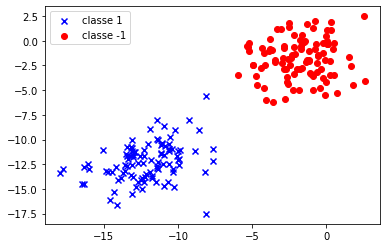

Données apres bruitage


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [28]:
seed = 42
np.random.seed(seed)
pos_cen = (-12, -12)
pos_sig = [[1, 4], [4, 1]]

neg_cen = (-2, -2)
neg_sig = [[1, 5], [4, 1]]
data,labels = genere_dataset_gaussian(pos_cen,pos_sig,neg_cen,neg_sig,100,-1,1)
print("Données avant bruitage")
plot2DSet(data,labels,-1,1)

shape = data.shape
mean = 20
std = 4
noise = generate_noise(shape,'poisson',mean,std)

data_noised = data + noise
print("Données apres bruitage")
plot2DSet(data_noised,labels,-1,1)

100%|█████████████████████████████████████████| 100/100 [02:48<00:00,  1.68s/it]


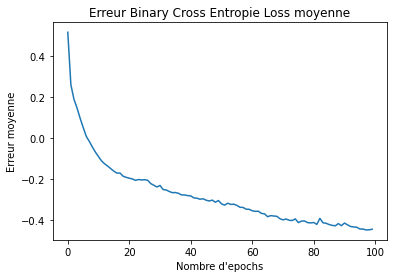

In [4]:
np.random.seed(42)
nb_classes = len(np.unique(Y_train))
n_samples = X_train.shape[0]

neuro_i_1 = 256
neuro_o_1 = 160
neuro_i_2 = 160
neuro_o_2 = 120
neuro_i_3 = 120
neuro_o_3 = 60
neuro_i_4 = 60
neuro_o_4 = 10
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 100
epochs = 100
nb_couches = 4


facteur_norma = 0.8



lineaire_1_enc = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_enc = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_enc = ModuleLineaire(neuro_i_3 ,neuro_o_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_enc = ModuleLineaire(neuro_i_4 ,neuro_o_4 ,plage_biais,facteur_norma,init=1)

lineaire_1_dec = ModuleLineaire(neuro_o_1 ,neuro_i_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_dec = ModuleLineaire(neuro_o_2 ,neuro_i_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_dec = ModuleLineaire(neuro_o_3 ,neuro_i_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_dec = ModuleLineaire(neuro_o_4 ,neuro_i_4 ,plage_biais,facteur_norma,init=1)

TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
BCE = BinaryCrossEntropie()


network_layers = [lineaire_1_enc,TanH,lineaire_2_enc,TanH,lineaire_3_enc,TanH,lineaire_4_enc,TanH,
                  lineaire_4_dec,TanH,lineaire_3_dec,TanH,lineaire_2_dec,TanH,lineaire_1_dec,sigmoide]
network = Sequentiel(network_layers)

auto_encodeur_usps = AutoEncodeur(network,BCE,regularisation=False)

auto_encodeur_usps.optimisation(X_train,X_train,batch_size,epochs,1e-4)

In [5]:
latent_repre = auto_encodeur_usps.encode(X_train)
X_train_hat = auto_encodeur_usps.decode(latent_repre)

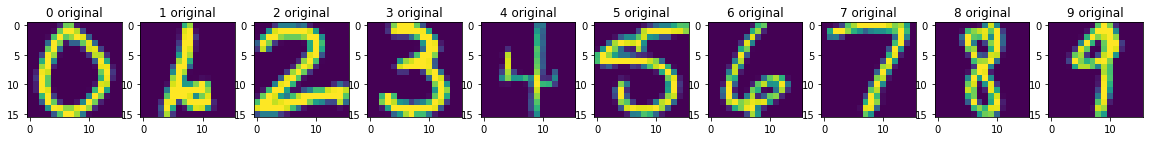

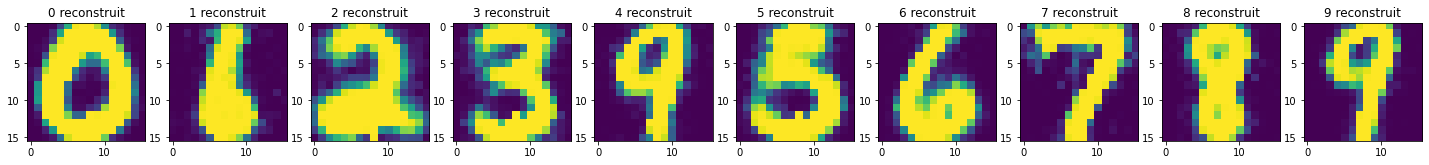

In [6]:
plt.figure(figsize=(20,15))
sample = np.random.randint(0,100)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" original")
    image = X_train[Y_train == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

plt.figure(figsize=(25,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" reconstruit")
    image = X_train_hat[Y_train == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

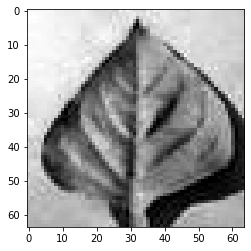

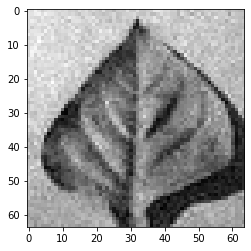

In [3]:

images  = get_images('data/pepper')
noise = generate_noise(images.shape[1],'normal',200,10)

images_noised = images + noise

plt.imshow(images[8].reshape((64,64)))
plt.show()
plt.imshow(images_noised[8].reshape((64,64)))
plt.show()

In [51]:
def create_auto_encodeur(X_train, input_dim, nb_couche_lin, facteur_norma, plage_biais, batch_size, epochs):
    np.random.seed(42)
    n_samples = X_train.shape[0]
    neuro_in = [input_dim]
    neuro_out = []
    for i in range(0,nb_couche_lin) : 
        neuro_out.append(neuro_in[::-1][0] // 2)
        neuro_in.append(neuro_out[::-1][0])
    neuro_in = neuro_in [:-1]
    modules_enc = []
    for i in range(nb_couche_lin -1):
        print(neuro_in[i])
        print(neuro_out[i])
        modules_enc.append(ModuleLineaire(neuro_in[i], neuro_out[i], plage_biais, facteur_norma, init=1))
        modules_enc.append(ModuleTanH())
        
    modules_enc.append(ModuleLineaire(neuro_in[nb_couche_lin-1], neuro_out[nb_couche_lin-1], plage_biais, facteur_norma, init=1))

    modules_dec = []
    #neuro_out = neuro_out[::-1]
    neuro_in = neuro_in[::-1]
    neuro_out = neuro_out[::-1]
    for i in range(nb_couche_lin-1):
        modules_dec.append(ModuleLineaire(neuro_out[i], neuro_in[i], plage_biais, facteur_norma, init=1))
        modules_dec.append(ModuleTanH())
        
    modules_dec.append(ModuleLineaire(neuro_out[nb_couche_lin-1], neuro_in[nb_couche_lin-1], plage_biais, facteur_norma, init=1))
    modules_dec.append(ModuleSigmoide())
    
    network = Sequentiel(modules_enc + modules_dec)
    BCE = BinaryCrossEntropie()
    auto_encodeur_usps = AutoEncodeur(network, BCE)
    auto_encodeur_usps.optimisation(X_train, X_train, batch_size, epochs,1e-6)
    
    return auto_encodeur_usps


In [2]:
import pickle as pkl
data = pkl.load(open("data/usps.pkl",'rb'))

X_train = data["X_train"]
Y_train = data["Y_train"]
X_test = data["X_test"]
Y_test = data["Y_test"]

In [3]:
tsne = TSNE(n_components=3, init='pca',n_iter=300, verbose=0)
repre_2D = tsne.fit_transform(X_train)

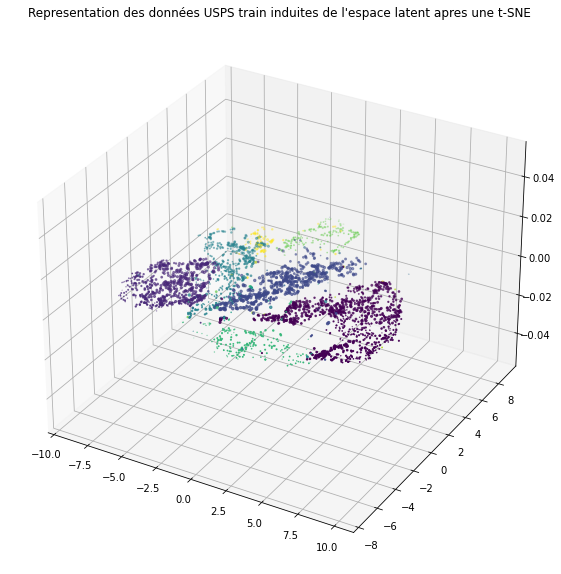

In [8]:
fig = plt.figure(figsize=(15,10))
fig.add_subplot(projection='3d')
plt.title("Representation des données USPS train induites de l'espace latent apres une t-SNE")
plt.scatter(repre_2D[:,0],repre_2D[:,1],repre_2D[:,2],c=Y_train)

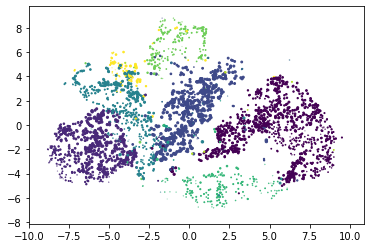

In [6]:
plt.scatter(repre_2D[:,0],repre_2D[:,1],repre_2D[:,2],c=Y_train)